Project 2
Jordan Wagner

Problem statement - Predict housing loan eligibility based on submitted information, this type of prediction (if accurate) would benefit both the applying person and the company considering the loan application. It would save the company time by automating the review process and would save the applier time by informing them of their eligibility and potentially identifying which areas of the application could be improved to increase their chance of approval.

Data set being used - kaggle.com/datasets/vikasukani/loan-eligible-dataset?resource=download the loan-train.csv data

There are 13 variables and 615 rows in this data set:
8 categorical (Gender, Married, Education, Self_Employed, Credit_History, dependents, Property_Area, Loan_Status)
4 numerical (Loan_Amount_Term, ApplicantIncome, CoapplicantIncome, LoanAmount)
1 identifying variable (Loan_ID)

A few variables are a bit opaque in meaning but are specified in the data set description. I'll supply that information here
for the sake of clarity:

Credit_History	= credit history meets eligibility guidelines
Loan_Amount_Term = Term of a loan in months
Loan_status = If the loan has been approved or not.

The rest of the variables are self explanatory but if you need further clarification on meaning please reference the above link.

The target variable for prediction will be loan_status which will show if the application will be approved or not based on the info submitted.



In [367]:
'''
Data Cleaning
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

data = pd.read_csv("loan-train.csv")
display(data)
print("shape", data.shape)
print("")
print("Column Headers\n", data.columns.tolist())
print("")

print("Data Types")
print(data.dtypes)
print("")

print("Values missing in each feature: ")
print(data.isnull().sum())


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


shape (614, 13)

Column Headers
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Data Types
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Values missing in each feature: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [368]:

remove = ['Loan_ID']
data.drop(remove, inplace=True, axis=1)
print("")

print("Drop Loan_ID")
print("shape", data.shape)
data = data.dropna()
print("")

print("Dropped Nulls")
print("shape", data.shape)

print("Change loan_status to 0 for y and 1 for N")
data['Loan_Status'].replace(['Y', 'N'], [0, 1], inplace=True)
data.head(10)


Drop Loan_ID
shape (614, 12)

Dropped Nulls
shape (480, 12)
Change loan_status to 0 for y and 1 for N


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,0
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,0
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,1
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,0
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,1
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,0


Above the raw data is considered showing the column headers, data types, and then dropping the identifying feature loan_id as it shouldnt be considered in the prediction model. Then the number of missing values in each feature are displayed and then the rows with missing features are dropped. 

In [369]:
'''
Display current data
Use value_counts() to see the range of values in each column.
Check if the target is balanced.
'''
print('')
print(data.Gender.value_counts(dropna=False))
print('')
print(data.Married.value_counts(dropna=False))
print('')
print(data.Dependents.value_counts(dropna=False))
print('')
print(data.Education.value_counts(dropna=False))
print('')
print(data.Self_Employed.value_counts(dropna=False))
print('')
print(data.ApplicantIncome.value_counts(dropna=False))
print('')
print(data.CoapplicantIncome.value_counts(dropna=False))
print('')
print(data.LoanAmount.value_counts(dropna=False))
print('')
print(data.Loan_Amount_Term.value_counts(dropna=False))
print('')
print(data.Credit_History.value_counts(dropna=False))
print('')
print(data.Property_Area.value_counts(dropna=False))
print('')
print(data.Loan_Status.value_counts(dropna=False))




Male      394
Female     86
Name: Gender, dtype: int64

Yes    311
No     169
Name: Married, dtype: int64

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

No     414
Yes     66
Name: Self_Employed, dtype: int64

2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: ApplicantIncome, Length: 405, dtype: int64

0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0      1
240.0       1
Name: CoapplicantIncome, Length: 232, dtype: int64

120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 186, dtype: int64

360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: i

The target variable is unbalanced and will need to be balanced before building the prediction model.


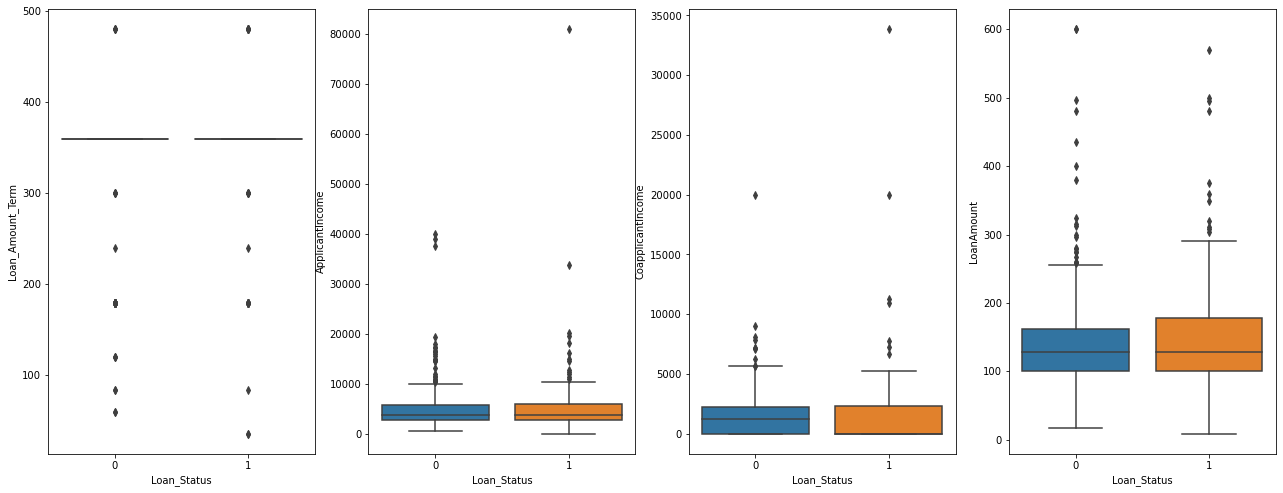

In [370]:
'''
Generate boxplots for all the numerical features vs. the target variable.
'''
num_list=['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig=plt.figure(figsize=(22, 18))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,4,i+1)
    sns.boxplot(x='Loan_Status',y=column, data=data)
    

In [371]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = data.loc[:, ['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y = data.loc[:, 'Loan_Status']

fs = SelectKBest(score_func=f_classif, k='all') 
bestFeatures = fs.fit(x, y)   
np.set_printoptions(suppress = True)
print('f-scores')
print(bestFeatures.scores_)
print('p-scores')
print(bestFeatures.pvalues_)
print('correlation coefficients')
print(data.corr())

f-scores
[0.02906542 0.89172481 1.1513591  2.47368441]
p-scores
[0.86470021 0.34548739 0.28380622 0.11642791]
correlation coefficients
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   
Loan_Status               0.043152           0.049020    0.071753   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.010838       -0.056152     0.043152  
CoapplicantIncome         -0.005775       -0.008692     0.049020  
LoanAmount                 0.050867       -0.040773     0.071753  
Loan_Amount_Term           1.000000        0.032937     0.007798  
Credit_History             0.032937        1.0

Variables considered have similar IQR so theres only slight variance for each. Each graph has significant outliers which can be explained by the distribution of the variables if you look back to where the value counts of each variable is displayed you can see that each variables is skewed toward a value causing the IQR to be weighted toward said value. Consider loan amount term for example, the vast majority of the data chooses the 360 month term over any other option. So the IQR sits squarly at that number and everything else is an outlier. Looking at the f-scores its clear that ApplicantIncome, CoapplicantIncome, LoanAmount are the most significant to the target vs loan_amount_term. ApplicatantIncome, coaplicantIncom, and loanAmount all have a distribution that is positively skewed. Loan_amount_term is slightly negatively skewed. All of the p-values are greater than .05 indicating that there is not a statistically significant difference between the groups. This would indicate that these numeric variables could safely be dropped. Variables correlations are not high enough to be dropped on correlation alone.

Any variables with zero to little variance? Loan_Amount_term has 0 variance when outliers are removed may be better as a category feature will include in category feature analysis. The other three have little variance.

Any features Irrelevant to the target variable? Any high-correlated Features? Nothing is highly-correlated and given the p-scores all seem irrelevant to the target.

In [372]:
'''
outlier removal for numeric features using concepts found here:
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
'''

below = data.quantile(0.25)
above = data.quantile(0.75)
iqr = above - below

categoryToDrop = ['Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Credit_History']
outliers_removed = data.copy()
print("Drop categories so they are unaffected by outlier removal process")
outliers_removed.drop(categoryToDrop, inplace=True, axis=1)
print("shape", outliers_removed.shape)
outliers_removed = outliers_removed[~((data < (below - 1.5 * iqr)) |(data > (above + 1.5 * iqr))).any(axis=1)]
print(outliers_removed.shape)
display(outliers_removed)



Drop categories so they are unaffected by outlier removal process
shape (480, 6)
(312, 6)


C:\Users\jorda\AppData\Local\Temp\ipykernel_14016\804742095.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_removed = outliers_removed[~((data < (below - 1.5 * iqr)) |(data > (above + 1.5 * iqr))).any(axis=1)]


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,4583,1508.0,128.0,360.0,Rural,1
2,3000,0.0,66.0,360.0,Urban,0
3,2583,2358.0,120.0,360.0,Urban,0
4,6000,0.0,141.0,360.0,Urban,0
5,5417,4196.0,267.0,360.0,Urban,0
...,...,...,...,...,...,...
607,3987,1411.0,157.0,360.0,Rural,0
608,3232,1950.0,108.0,360.0,Rural,0
609,2900,0.0,71.0,360.0,Rural,0
611,8072,240.0,253.0,360.0,Urban,0


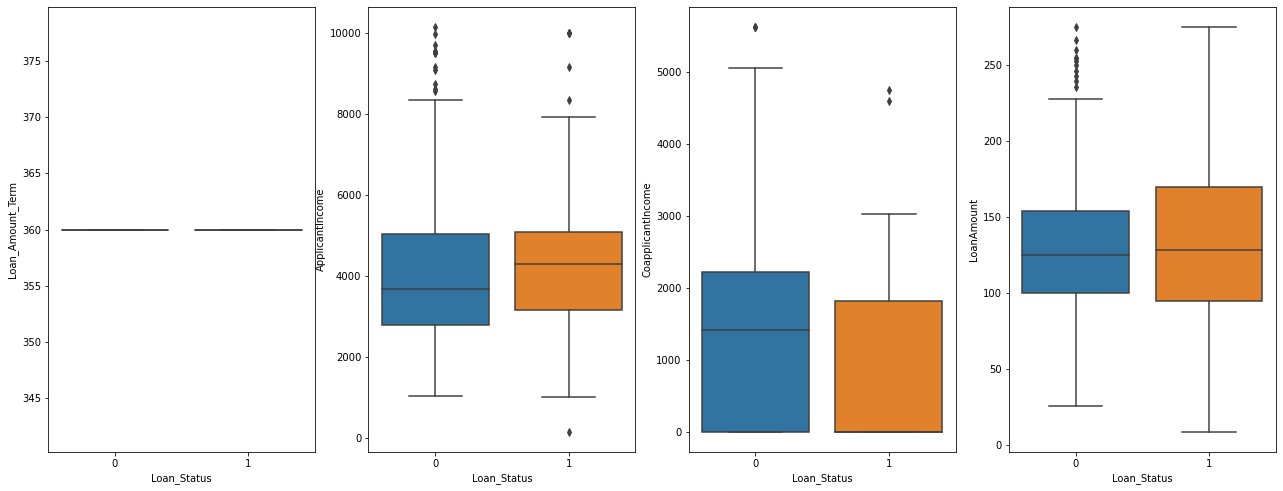

In [373]:
'''
Generate boxplots for all the numerical features vs. the target variable after outliers removed.
'''
num_list=['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig=plt.figure(figsize=(22, 18))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,4,i+1)
    sns.boxplot(x='Loan_Status',y=column, data=outliers_removed)
    


In [375]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = outliers_removed.loc[:, ['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y = outliers_removed.loc[:, 'Loan_Status']

fs = SelectKBest(score_func=f_classif, k='all') 
bestFeatures = fs.fit(x, y)   
np.set_printoptions(suppress = True)
outliers_removed = outliers_removed.dropna()
print('f-scores')
print(bestFeatures.scores_)
print('p-scores')
print(bestFeatures.pvalues_)
print('correlation coefficients')
print(outliers_removed.corr())

f-scores
[       nan 1.03698125 5.57167033 0.10471173]
p-scores
[       nan 0.30931866 0.01887234 0.7464652 ]
correlation coefficients
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.251623    0.550941   
CoapplicantIncome        -0.251623           1.000000    0.267738   
LoanAmount                0.550941           0.267738    1.000000   
Loan_Amount_Term               NaN                NaN         NaN   
Loan_Status               0.057740          -0.132875    0.018376   

                   Loan_Amount_Term  Loan_Status  
ApplicantIncome                 NaN     0.057740  
CoapplicantIncome               NaN    -0.132875  
LoanAmount                      NaN     0.018376  
Loan_Amount_Term                NaN          NaN  
Loan_Status                     NaN     1.000000  


C:\Users\jorda\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\jorda\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Removing outliers improved p-scores but also shows that loan term may be better as a categorical variable. P-scores improved coapplicant income lower than .05. I dont think its worth including in the prediction model as removing outliers significantly drops the amount of data and balancing to the reduced amount with the significant categorical values may be detrimental to the overall accuracy of the perdiction model.

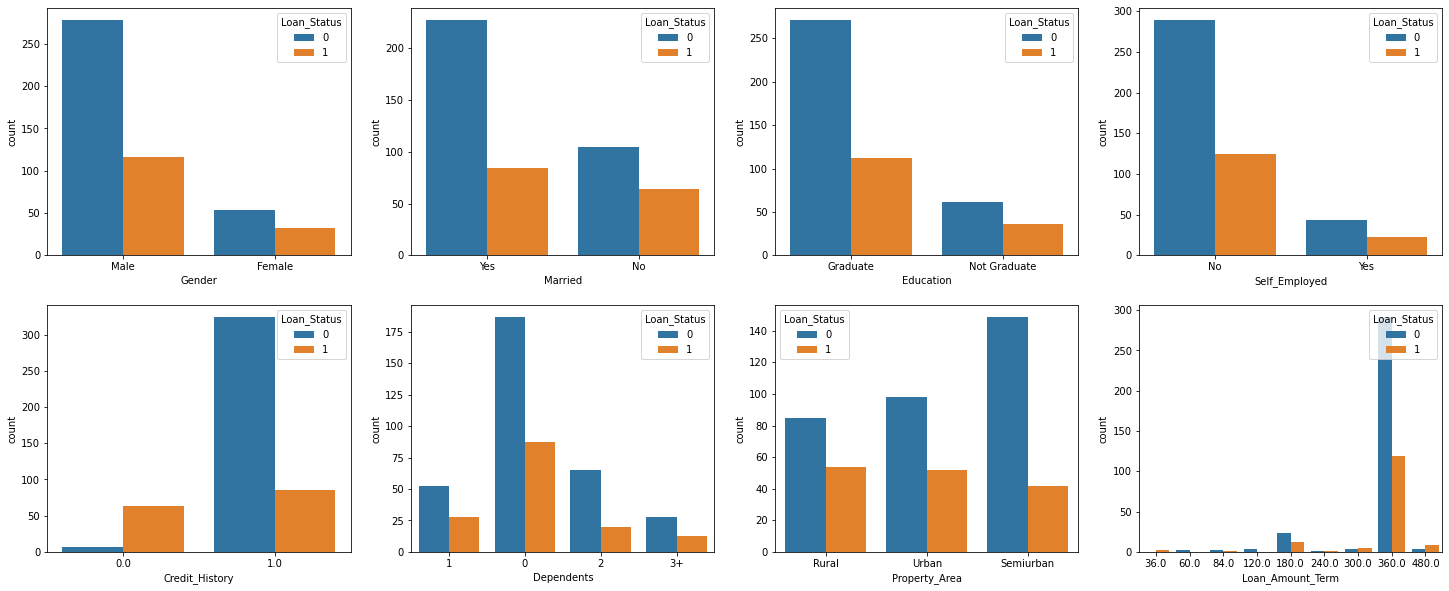

In [376]:
'''
Generate grouped barplots for all the categorical features vs. the target variable. 
'''

cat_list=['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area', 'Loan_Amount_Term']
fig=plt.figure(figsize=(25,10))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,4,i+1)
    chart=sns.countplot(x=column, hue='Loan_Status', data=data)

Given the barplots for categorical features there are several things to note. Males apply for home loans more than females, at least in the data given. From the data males are also more likely to be approved for the loan, though this may change with additional data for females. Married individuals have a greater chance for loan approval than non-married and the data indicates that they apply more for home loans given the number of applications for married individuals is higher. Graduates are more likely to be approved and seemingly apply more. Individuals who are not self_employed have a greater chance of loan approval. Individuals with credit_history that fits into the guidelines are much more likely to be approved than those with abnormal credit history. Individuals without dependents are more likely to be approved. Loans for semi urban properties seem to have the greatest approval chance. Loan_Amount_term of 360 months outweighs all other loan terms skewing the data toward that value. 

In [377]:
'''
Convert categorical data to numeric
for education 0 = not Graduate 1 = graduate
for gender 0=male, 1=female
for married 0=no, 1=yes
for self_emplpoyed 0=no, 1 =yes
for dependents 3 = 3 or more
for property area 0=rural, 1=urban, 2=semiurban
'''
data['Education'].replace(['Not Graduate', 'Graduate'], [0, 1], inplace=True)
data['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
data['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
data['Self_Employed'].replace(['No', 'Yes'], [0, 1], inplace=True)
data['Dependents'].replace(['3+'], [3], inplace=True)
data['Property_Area'].replace(['Rural', 'Urban', 'Semiurban'], [0, 1, 2], inplace = True)

In [378]:
'''
Use chi-squared test to see the dependance of each categorical feature and the target.
Using the p-value to decide which variables shall be dropped.
'''

x = data.loc[:, ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Dependents', 'Property_Area']]
y = data.loc[:, 'Loan_Status']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)



[ 1.63935692  2.13210084  0.45431405  0.49891951 19.61774587  0.80622846
  6.92660665]
[0.20041372 0.14424294 0.50029337 0.47997526 0.00000946 0.36923766
 0.00849227]


In [385]:
'''
only credit history, coapplicant_amount, and property_area have p-values less than .05 the other features can be safely dropped.
we will make note of the features that can be dropped here including the numerical ones.
For the sake of contrast we will compare the regression model with all features to the accuracy of one built after
dropping features.
'''
numericToDrop = ['Loan_Amount_Term', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']
categoryToDrop = ['Gender', 'Married', 'Education', 'Self_Employed', 'Dependents']

print('data frame where numeric features are dropped')
numericDroppedFrame = data.copy()
print('shape', numericDroppedFrame.shape)
numericDroppedFrame.drop(numericToDrop, inplace=True, axis=1)
print('shape', numericDroppedFrame.shape)
print(display(numericDroppedFrame))
print("")


data frame where numeric features are dropped
shape (480, 12)
shape (480, 8)


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,1.0,0,1
2,0,1,0,1,1,1.0,1,0
3,0,1,0,0,0,1.0,1,0
4,0,0,0,1,0,1.0,1,0
5,0,1,2,1,1,1.0,1,0
...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,1.0,0,0
610,0,1,3,1,0,1.0,0,0
611,0,1,1,1,0,1.0,1,0
612,0,1,2,1,0,1.0,1,0


None



In [386]:
print('data frame where categorical features are dropped')
catDroppedFrame = data.copy()
catDroppedFrame.drop(categoryToDrop, inplace=True, axis=1)
print('shape', catDroppedFrame.shape)
print(display(catDroppedFrame))
print("")

data frame where categorical features are dropped
shape (480, 7)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,0,1
2,3000,0.0,66.0,360.0,1.0,1,0
3,2583,2358.0,120.0,360.0,1.0,1,0
4,6000,0.0,141.0,360.0,1.0,1,0
5,5417,4196.0,267.0,360.0,1.0,1,0
...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0
610,4106,0.0,40.0,180.0,1.0,0,0
611,8072,240.0,253.0,360.0,1.0,1,0
612,7583,0.0,187.0,360.0,1.0,1,0


None



In [387]:
print("frame where all features with p-value > 0.05 are dropped")
bothDropped = numericDroppedFrame.copy()
bothDropped.drop(categoryToDrop, inplace=True, axis=1)
print('shape', bothDropped.shape)
print(display(bothDropped))

frame where all features with p-value > 0.05 are dropped
shape (480, 3)


,Credit_History,Property_Area,Loan_Status
1,1.0,0,1
2,1.0,1,0
3,1.0,1,0
4,1.0,1,0
5,1.0,1,0
...,...,...,...
609,1.0,0,0
610,1.0,0,0
611,1.0,1,0
612,1.0,1,0


None


In [388]:
'''
Change the categorical variables with more than two unique values to dummy variables. 
Property area has more than 2 unique values.
Feature scaling isnt necessary as we will be using logistic regression.
'''
bothDropped['Property_Area'].replace([0, 1, 2], ['Rural', 'Urban', 'Semiurban'], inplace=True)
dummyVar = pd.get_dummies(bothDropped, columns = ['Property_Area'])
display(dummyVar)


,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1,1,0,0
2,1.0,0,0,0,1
3,1.0,0,0,0,1
4,1.0,0,0,0,1
5,1.0,0,0,0,1
...,...,...,...,...,...
609,1.0,0,1,0,0
610,1.0,0,1,0,0
611,1.0,0,0,0,1
612,1.0,0,0,0,1


In [389]:
print("For contrast using other dataFrames to check model")
numericDroppedFrame['Property_Area'].replace([0, 1, 2], ['Rural', 'Urban', 'Semiurban'], inplace=True)
numericDroppedFrame['Dependents'].replace(['0', '1', '2', '3+'], ['0 dependents', 'one dependent', 'two dependents', 'three or more'], inplace=True)
dummyNumeric = pd.get_dummies(numericDroppedFrame, columns = ['Property_Area', 'Dependents'])
print(display(dummyNumeric))

For contrast using other dataFrames to check model


,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_3,Dependents_0 dependents,Dependents_one dependent,Dependents_two dependents
1,0,1,1,0,1.0,1,1,0,0,0,0,1,0
2,0,1,1,1,1.0,0,0,0,1,0,1,0,0
3,0,1,0,0,1.0,0,0,0,1,0,1,0,0
4,0,0,1,0,1.0,0,0,0,1,0,1,0,0
5,0,1,1,1,1.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1.0,0,1,0,0,0,1,0,0
610,0,1,1,0,1.0,0,1,0,0,1,0,0,0
611,0,1,1,0,1.0,0,0,0,1,0,0,1,0
612,0,1,1,0,1.0,0,0,0,1,0,0,0,1


None


In [390]:
numericDroppedFrame['Property_Area'].replace([0, 1, 2], ['Rural', 'Urban', 'Semiurban'], inplace=True)
numericDroppedFrame['Dependents'].replace(['0', '1', '2', '3+'], ['0 dependents', 'one dependent', 'two dependents', 'three or more'], inplace=True)
dummyNumeric = pd.get_dummies(numericDroppedFrame, columns = ['Property_Area', 'Dependents'])
print(display(dummyNumeric))

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_3,Dependents_0 dependents,Dependents_one dependent,Dependents_two dependents
1,0,1,1,0,1.0,1,1,0,0,0,0,1,0
2,0,1,1,1,1.0,0,0,0,1,0,1,0,0
3,0,1,0,0,1.0,0,0,0,1,0,1,0,0
4,0,0,1,0,1.0,0,0,0,1,0,1,0,0
5,0,1,1,1,1.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1.0,0,1,0,0,0,1,0,0
610,0,1,1,0,1.0,0,1,0,0,1,0,0,0
611,0,1,1,0,1.0,0,0,0,1,0,0,1,0
612,0,1,1,0,1.0,0,0,0,1,0,0,0,1


None


In [391]:
'''
Split the dataset into 80% training dataset and 20% testing dataset. 
'''

x = dummyVar.loc[:, dummyVar.columns!='Loan_Status']
y = dummyVar['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)  

x2 = dummyNumericDropped.loc[:, dummyNumericDropped.columns!='Loan_Status']
y2 = dummyNumericDropped['Loan_Status']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0, stratify=y)  

x3 = catDroppedFrame.loc[:, catDroppedFrame.columns!='Loan_Status']
y3 = catDroppedFrame['Loan_Status']
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=0, stratify=y)  


In [392]:
'''
Use the over-sampling method to balance the training dataset
'''
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0) 
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)
oversampled_x2,oversampled_y2=os.fit_resample(x_train2, y_train2)
oversampled_x3,oversampled_y3=os.fit_resample(x_train3, y_train3)

print('Fully engineered test train split.')
print(x_train.shape)
print(oversampled_x.shape)
print('')
print('Numerical features dropped category remain')
print(x_train2.shape)
print(oversampled_x2.shape)
print('')
print('categorical features dropped numeric remain')
print(x_train3.shape)
print(oversampled_x3.shape)


Fully engineered test train split.
(384, 4)
(532, 4)

Numerical features dropped category remain
(384, 12)
(532, 12)

categorical features dropped numeric remain
(384, 6)
(532, 6)


In [393]:
'''
Build the logistic regression model with the training dataset. Evaluate the model with the testing dataset.
Get the accuracy score of the model and the confusion matrix of the result
'''
from sklearn.metrics import ConfusionMatrixDisplay
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

LogRegression2 = LogisticRegression(penalty='none', max_iter=2000)
LogRegression2.fit(oversampled_x2, oversampled_y2.values.ravel())

LogRegression3 = LogisticRegression(penalty='none', max_iter=2000)
LogRegression3.fit(oversampled_x3, oversampled_y3.values.ravel())

test_pred = LogRegression.predict(x_test)
test_pred2 = LogRegression2.predict(x_test2)
test_pred3 = LogRegression3.predict(x_test3)

print("Fully Engineered Result")
print("Accuracy Score")
print(accuracy_score(y_test, test_pred))
print("")

print("categorical only score")
print("Accuracy Score")
print(accuracy_score(y_test2, test_pred2))
print("")

print("numeric only score")
print("Accuracy Score")
print(accuracy_score(y_test3, test_pred3))



Fully Engineered Result
Accuracy Score
0.8229166666666666

categorical only score
Accuracy Score
0.7291666666666666

numeric only score
Accuracy Score
0.7708333333333334


Matrix for fully engineered model


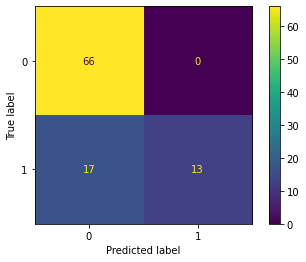

In [394]:

print("Matrix for fully engineered model")
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

In [395]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogRegression, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

scores = pd.Series(scores)
print('')
print("min:",scores.min())
print("mean:",scores.mean())
print("max:",scores.max())

Cross-Validation Accuracy Scores [0.79487179 0.84615385 0.79487179 0.84615385 0.81578947 0.78947368
 0.71052632 0.86842105 0.86842105 0.71052632]

min: 0.7105263157894737
mean: 0.8045209176788124
max: 0.868421052631579


Do you use train_test_split or cross validation to validate the result?
I've used both train_test_split and cross validation to validate the results

Which algorithm is appropriate for this problem?
Due to the fact that this is a classification problem with two possible results IE approved vs denied logistic regression was the best choice.

Which metrics do you use to evaluate the prediction model?
I used accuracy score and the confusion matrix to evaluate the prediction model.


After the cleaning and analysis of the data we end up with a prediction model that only uses two of the original 13 features to accurately predict approval for a home loan. Good credit history as well as property location are the two most significant features in determining whether an applicant will be approved. The logistic regression model developed in this report is on average 80% accurate with the mean accuracy score from cross validation being .8045. The accuracy score from the train_test_split was .82 or 82% accurate indicating that this is a reliable prediction model. The report also showcases leaving features in and how they change the accuracy of the model showing that both the numerical features and other categorical features diminish the accuracy score significantly. Coapplicant income, after having outliers removed, did have a p-value of less that .05% but reducing the overall data to be balanced with the reduction caused by the outliers felt detrimental. Tests were done with the inclusion of coapplicant data but it did not improve the accuracy score by more than .01 so the decision was made to leave it out. Ultimately the resulting prediction model is accurate and effective.